# Neural Networks in Keras

by [Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia


version 2.0, June 2019

 [Machine Learning 2019-1](https://fagonzalezo.github.io/ml-2019-1/)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). 



In [0]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

Using TensorFlow backend.


### 1. Neural network training in Keras

We will build a multilayer network to solve the following classification problem:

W0614 04:48:22.964657 140019437877120 _axes.py:4217] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
W0614 04:48:22.975177 140019437877120 _axes.py:4217] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


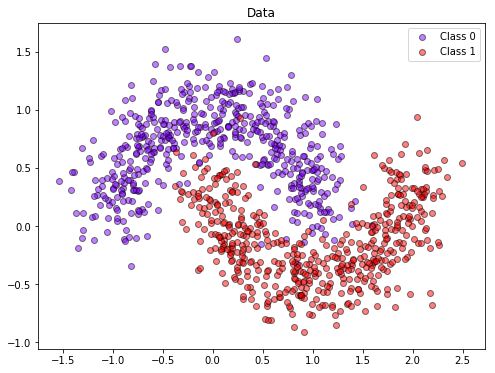

In [0]:
x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

We define a `Sequential` model. The model is built by stacking layers. The first layer is a dense layer that receives 2 inputs and has 20 neurons with `relu` activation. The second and last layer has a neuron with sigmoid activation.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=20, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

The structured of the neural network can be visualized with:

In [0]:
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_3 (Dense)                (None, 20)                  60         
______________________________________________________________________
activation_3 (Activation)      (None, 20)                  0          
______________________________________________________________________
dense_4 (Dense)                (None, 1)                   21         
______________________________________________________________________
activation_4 (Activation)      (None, 1)                   0          
Total params: 81
Trainable params: 81
Non-trainable params: 0
______________________________________________________________________


The learning process is configured with `compile`. Here we will use a cross-entropy loss function and an SGD optimizer. The learning process will keep track of the accuracy.

In [0]:
from keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

W0614 04:51:00.845657 140019437877120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 04:51:00.854135 140019437877120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0614 04:51:00.861738 140019437877120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


The model is trained by calling the function `fit`:

In [0]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.6827 - acc: 0.5760
Epoch 2/100
 - 0s - loss: 0.4798 - acc: 0.8350
Epoch 3/100
 - 0s - loss: 0.3810 - acc: 0.8440
Epoch 4/100
 - 0s - loss: 0.3303 - acc: 0.8530
Epoch 5/100
 - 0s - loss: 0.3038 - acc: 0.8650
Epoch 6/100
 - 0s - loss: 0.2860 - acc: 0.8760
Epoch 7/100
 - 0s - loss: 0.2766 - acc: 0.8770
Epoch 8/100
 - 0s - loss: 0.2708 - acc: 0.8790
Epoch 9/100
 - 0s - loss: 0.2672 - acc: 0.8780
Epoch 10/100
 - 0s - loss: 0.2652 - acc: 0.8820
Epoch 11/100
 - 0s - loss: 0.2640 - acc: 0.8810
Epoch 12/100
 - 0s - loss: 0.2623 - acc: 0.8810
Epoch 13/100
 - 0s - loss: 0.2610 - acc: 0.8820
Epoch 14/100
 - 0s - loss: 0.2592 - acc: 0.8830
Epoch 15/100
 - 0s - loss: 0.2590 - acc: 0.8840
Epoch 16/100
 - 0s - loss: 0.2576 - acc: 0.8850
Epoch 17/100
 - 0s - loss: 0.2568 - acc: 0.8870
Epoch 18/100
 - 0s - loss: 0.2563 - acc: 0.8890
Epoch 19/100
 - 0s - loss: 0.2548 - acc: 0.8870
Epoch 20/100
 - 0s - loss: 0.2541 - acc: 0.8850
E

The trained model can be use to classify new samples 
using `predict`:

In [0]:
print(model.predict(np.array([[0, 0]])))

[[0.97206306]]


This is the decision region of the trained model:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


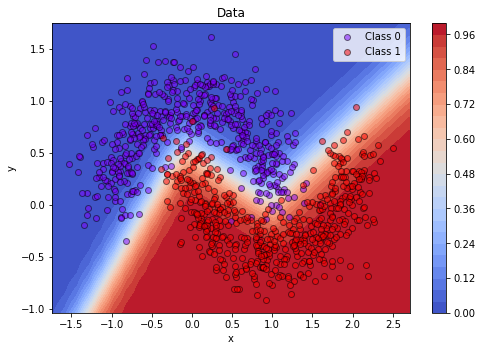

In [0]:
def pred_fun(x1, x2):
        xval = np.array([[x1, x2]])
        return model.predict(xval)[0, 0]

pl.figure(figsize = (8,16/3))    
plot_decision_region(x_train, pred_fun)
plot_data(x_train, y_train)

### 2. Training a text classifier

We will create a model to classifiy Reuters newswires
according to their topic. The original dataset is available [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection), but Keras has functions that facilitate the task of loading and preprocessing it.

In [0]:
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer

max_words = 1000

print('Loading data...')
# Work around for a Keras issue
old = np.load 
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)
# load dataset 
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
# Work around
np.load = old
del(old)


print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')


Loading data...
2113536/2110848 [==============================] - 0s 0us/step
8982 train sequences
2246 test sequences
46 classes


Is instance is represented by a sequence of numbers which correspond to indices of the corresponding words.

In [0]:
print(x_train[100])


[1, 367, 2, 169, 65, 87, 209, 30, 306, 228, 10, 803, 305, 96, 5, 196, 15, 10, 523, 2, 2, 293, 484, 2, 2, 2, 8, 145, 7, 10, 2, 6, 10, 294, 517, 237, 2, 367, 2, 7, 2, 2, 483, 2, 2, 8, 367, 2, 4, 169, 387, 66, 209, 30, 2, 652, 2, 9, 209, 30, 2, 228, 10, 803, 305, 96, 5, 196, 15, 51, 36, 2, 24, 2, 5, 4, 196, 150, 10, 523, 320, 64, 992, 2, 13, 367, 190, 297, 64, 85, 2, 6, 2, 122, 9, 36, 2, 24, 269, 2, 27, 367, 212, 114, 45, 30, 2, 7, 126, 2, 13, 367, 6, 2, 4, 169, 65, 96, 28, 432, 23, 189, 2, 4, 2, 320, 5, 196, 15, 10, 523, 25, 730, 190, 57, 64, 6, 2, 2, 2, 7, 2, 122, 2, 2, 8, 269, 2, 2, 7, 608, 2, 30, 2, 2, 2, 8, 43, 339, 43, 231, 9, 667, 2, 126, 212, 2, 21, 2, 249, 311, 13, 260, 489, 9, 65, 2, 64, 2, 2, 249, 954, 36, 152, 2, 2, 506, 24, 135, 367, 311, 34, 420, 4, 2, 200, 2, 13, 137, 730, 190, 7, 104, 570, 52, 64, 2, 2, 4, 642, 5, 405, 2, 2, 24, 76, 847, 2, 2, 6, 10, 548, 320, 34, 325, 136, 694, 2, 2, 8, 10, 2, 847, 7, 4, 169, 76, 2, 10, 2, 2, 5, 141, 2, 36, 152, 36, 8, 126, 358, 367, 65, 

The map for word to index is also provided, so it is possible to decode the instance back to text:

In [0]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
num_words = max(word_index.values()) + 1
words = ['']*num_words
for word in word_index:
    words[word_index[word]] = word
print([words[i-3] for i in x_train[100][1:] if i!= 2])

557056/550378 [==============================] - 0s 0us/step
['opec', 'world', 'oil', 'prices', 'should', 'be', 'set', 'around', 'a', 'fixed', 'average', 'price', 'of', '18', 'dlrs', 'a', 'barrel', 'general', 'secretary', 'said', 'today', 'in', 'a', 'to', 'a', 'european', 'community', 'ec', 'opec', 'in', 'here', 'said', 'opec', 'the', 'world', 'energy', 'trade', 'should', 'be', 'without', 'and', 'should', 'be', 'around', 'a', 'fixed', 'average', 'price', 'of', '18', 'dlrs', 'but', 'he', 'that', 'of', 'the', '18', 'dlr', 'a', 'barrel', 'level', 'had', 'caused', 'for', 'opec', 'countries', 'who', 'had', 'been', 'to', 'production', 'and', 'he', 'that', 'such', 'by', 'opec', 'states', 'could', 'not', 'be', 'in', 'some', 'for', 'opec', 'to', 'the', 'world', 'oil', 'price', 'at', 'what', 'is', 'now', 'the', 'level', 'of', '18', 'dlrs', 'a', 'barrel', 'its', 'member', 'countries', 'have', 'had', 'to', 'in', 'production', 'said', 'such', 'in', 'certain', 'be', 'said', 'as', 'well', 'as', 'fina

Data is encoded using a bag of words representation, i.e. a matrix of size num of instances by vocabulary size

In [0]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [0]:
print(x_train[100,:10])


[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


Labels are converted to one-hot representation:

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


Now we build a dense neural network with one hidden layer:

In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_5 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_5 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_6 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_6 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


We configure the learning task to use SGD as optimization:

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])


Now we can train the model using a 0.1 training validation split:

In [0]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 157us/step - loss: 2.4542 - acc: 0.3630 - val_loss: 2.3069 - val_acc: 0.4260
Epoch 2/5
8083/8083 [==============================] - 1s 145us/step - loss: 2.1809 - acc: 0.4397 - val_loss: 2.1788 - val_acc: 0.4750
Epoch 3/5
8083/8083 [==============================] - 1s 142us/step - loss: 2.0693 - acc: 0.4876 - val_loss: 2.0863 - val_acc: 0.4905
Epoch 4/5
8083/8083 [==============================] - 1s 138us/step - loss: 1.9903 - acc: 0.5032 - val_loss: 2.0180 - val_acc: 0.5061
Epoch 5/5
8083/8083 [==============================] - 1s 132us/step - loss: 1.9276 - acc: 0.5163 - val_loss: 1.9608 - val_acc: 0.5150


Finally, we test the performance over the test set:

In [0]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 53us/step
Test score: 1.926467072188801
Test accuracy: 0.5258236865804117
